# Descrizione del problema
Il nostro obiettivo è quello di creare un modello di regressione in grado di predire la quantità di grano prodotto da un determinato paese, conoscendo i seguenti fattori, ambientiali e non:
- Paese.
- Quantità media di pioggia caduta.
- Temperatura.
- Quantità di pesticidi.
- Popolazione del paese.

Cercando online, siamo riusciti a trovare i dataset necessari. I dataset sono stati presi dal sito online della FAO(Food and Agricolture Organization of the United Nations) e dal sito delle Nazioni Unite.

# Descrizione dei dati
I dataset sono 4:
- `yield`, che contiene i dati relativi alla quantità raccolta di diversi frumenti, tra cui il grano.
- `rainfall`, che contiene i dati relativi alla pioggia.
- `temp`, che contiene i dati relativi alla temperatura.
- `pesticides`, che contiene i dati relativi ai pesticidi.
- `population`, che contiene i dati relativi alla popolazione.

Importiamo le librerie necessarie:

In [321]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
%matplotlib inline

### Rain

In [322]:
rain = pd.read_csv('rainfall.csv')
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0    Area                          6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 157.8+ KB


In [323]:
rain.shape

(6727, 3)

In [324]:
rain.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


Come possiamo vedere, il dataset `rain` ha 3 feature:
- `Area`, che contiene il nome dello stato.
- `Year`, che indica l'anno in cui sono stati raccolti i dati.
- `average_rain_fall_mm_per_year`, che indica la quantità media di pioggia caduta in millimetri, in un determinato anno e in un determinato paese.

Inoltre, le feature `Area` e `average_rain_fall_mm_per_year` vengono memorizzate come `object`. Questo succede poichè nel leggere i dati, Pandas converte di deafult in object tutti i tipi che non sono interi.Dunque, cambiamo il tipo di `Area` in `String`, ed il tipo di `average_rain_fall_mm_per_year` in `Float`.

In [325]:
rain.describe()

,Year
count,6727.000000
mean,2001.354839
std,9.530114
min,1985.000000
25%,1993.000000
50%,2001.000000
75%,2010.000000
max,2017.000000


Notiamo che il dataset, per ogni `Area`, contiene dati dal 1985 al 2017.

In [326]:
rain['average_rain_fall_mm_per_year'] = pd.to_numeric(rain['average_rain_fall_mm_per_year'],errors = 'coerce')
rain[' Area'] = rain[' Area'].astype(pd.StringDtype())
rain.rename(columns={' Area': 'Area'}, inplace=True)
rain.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           6727 non-null   string 
 1   Year                           6727 non-null   int64  
 2   average_rain_fall_mm_per_year  5947 non-null   float64
dtypes: float64(1), int64(1), string(1)
memory usage: 157.8 KB


Oltre ad una migliore rappresentazione dei dati, otteniamo anche una dimensione fissa del file di 157.8 KB.

In [327]:
print(f"Numero totale di paesi: {rain['Area'].unique().size}")

Numero totale di paesi: 217


Il dataset contiene 217 paesi in totale.

In [328]:
rain.dropna()
rain.shape

(6727, 3)

Chiamando il metodo `dropna` togliamo tutte le righe contenenti valori null. Osserviamo però che la shape del data frame non è cambiato, quindi non erano presenti righe con valori null.

### Pesticides

In [329]:
pest = pd.read_csv('pesticides.csv')
pest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Domain   4349 non-null   object 
 1   Area     4349 non-null   object 
 2   Element  4349 non-null   object 
 3   Item     4349 non-null   object 
 4   Year     4349 non-null   int64  
 5   Unit     4349 non-null   object 
 6   Value    4349 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 238.0+ KB


In [330]:
pest.shape

(4349, 7)

In [331]:
pest.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


Il dataset contiene le seguenti features:
- `Domain`, dominio dei dati raccolti. Il dominio sarà lo stesso per tutte le istanze del dataset.
- `Item`, tipologia di prodotto utilizzato. Nel nostro caso sono solo pesticicidi.
- `Area`, nome del paese in questione,
- `Year`, anno in cui sono state raccolte tali informazioni.
- `Unit`, unità di misura(in questo caso tonnellate).
- `Value`, quantità di pesticidi usati in un determinato anno in un determinato paese.

Le feature `Domain`, `Element`, `Item` e `Unit` sono inutili per il nostro modello, perciò le rimuoviamo. Inoltre cambiamo il nome della colonna `Value` in `Value_in_t` per indicare l'unità di misura e rimuoviamo le eventuali righe contenenti valori null.

In [332]:
pest['Area'] = pest['Area'].astype(pd.StringDtype())

In [333]:
pest.dropna()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.00
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.00
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.00
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.00
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.00
...,...,...,...,...,...,...,...
4344,Pesticides Use,Zimbabwe,Use,Pesticides (total),2012,tonnes of active ingredients,3375.53
4345,Pesticides Use,Zimbabwe,Use,Pesticides (total),2013,tonnes of active ingredients,2550.07
4346,Pesticides Use,Zimbabwe,Use,Pesticides (total),2014,tonnes of active ingredients,2185.07
4347,Pesticides Use,Zimbabwe,Use,Pesticides (total),2015,tonnes of active ingredients,2185.07


In [334]:
pest.drop(['Domain', 'Item', 'Unit', 'Element'], axis = 1, inplace= True)
pest.rename(columns = {'Value':'pesticides_in_t'}, inplace=True)
pest.head()

,Area,Year,pesticides_in_t
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0
3,Albania,1993,121.0
4,Albania,1994,201.0


In [335]:
pest.describe()

,Year,pesticides_in_t
count,4349.000000,4.349000e+03
mean,2003.138883,2.030334e+04
std,7.728044,1.177362e+05
min,1990.000000,0.000000e+00
25%,1996.000000,9.300000e+01
50%,2003.000000,1.137560e+03
75%,2010.000000,7.869000e+03
max,2016.000000,1.807000e+06


Come possiamo notare, il dataset contiene dati dal 1990 al 2016.

In [336]:
pest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             4349 non-null   string 
 1   Year             4349 non-null   int64  
 2   pesticides_in_t  4349 non-null   float64
dtypes: float64(1), int64(1), string(1)
memory usage: 102.1 KB


In [337]:
pest.shape

(4349, 3)

Eseguendo le operazioni precedenti, siamo riusciti a ridurre la dimensione totale del dataset a 102.1 KB. Il numero di righe non è cambiato dopo aver chiamato il metodo `dropna`, perciò non erano presenti righe con valori null.

In [338]:
print(f"Numero totale di paesi: {pest['Area'].unique().size}")

Numero totale di paesi: 168


Vediamo che il numero di paesi di questo dataset è minore rispetto al dataest `rain`. Dunque, per poter procedere verso il merging dei vari dataset per creare uno solo, bisogna rimuovere da `rain` tutte le righe rigurdanti i paesi non contenuti in `pesticides`.

### Temperature

In [339]:
temp_data = pd.read_csv('temp.csv')
temp_data.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [340]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71311 entries, 0 to 71310
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      71311 non-null  int64  
 1   country   71311 non-null  object 
 2   avg_temp  68764 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


La colonna "country" è composta da oggetti, per risparmiare della memoria e rendere più facile il suo utilizzo, tutti i valori vengono trasformati in stringhe

In [341]:
temp_data['country'] = temp_data['country'].astype('string')

In [342]:
temp_data.isna().sum()

year           0
country        0
avg_temp    2547
dtype: int64

In [343]:
temp_data = temp_data.dropna()

In [344]:
temp_data

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
7,1856,Côte D'Ivoire,26.28
8,1857,Côte D'Ivoire,25.17
...,...,...,...
71306,2009,Mexico,21.76
71307,2010,Mexico,20.90
71308,2011,Mexico,21.55
71309,2012,Mexico,21.52


In [345]:
temp_data[(temp_data['country']=='Russia') & (temp_data['year']==1990)]

,year,country,avg_temp
14889,1990,Russia,3.77
31683,1990,Russia,5.00
43772,1990,Russia,5.81
47112,1990,Russia,1.84
47981,1990,Russia,2.37
49827,1990,Russia,2.62
56606,1990,Russia,5.05
66063,1990,Russia,3.45
68622,1990,Russia,9.10


In alcuni casi, data la grandezza degli stati sono presenti più valori per coppia Stato-Anno, quindi è necessario tenere un solo valore per coppia. Per fare ciò elimino tutte le righe eccetto la prima.

In [346]:
temp_data = temp_data.drop_duplicates(['country', 'year'])

In [347]:
temp_data[(temp_data['country']=='Russia') & (temp_data['year']==1990)]

,year,country,avg_temp
14889,1990,Russia,3.77


In [348]:
temp_data.describe()

,year,avg_temp
count,27479.000000,27479.000000
mean,1907.047891,16.241992
std,67.873286,7.984672
min,1743.000000,-12.130000
25%,1860.000000,9.000000
50%,1913.000000,16.400000
75%,1963.000000,24.515000
max,2013.000000,30.420000


In [349]:
print(temp_data[temp_data['avg_temp'] == temp_data['avg_temp'].min()])
print(temp_data[temp_data['avg_temp'] == temp_data['avg_temp'].max()])

      year     country  avg_temp
4416  1815  Kazakhstan    -12.13
       year country  avg_temp
46776  2013   Niger     30.42


Come si può osservare dalla tabella sopra la temperatura minima registrata nel dataset è di -14.3 C in Russia nel 1815 mentre quella massima è di 30.7C in Sudan nel 2010

In [350]:
temp_year_list = temp_data['year'].unique()
temp_country_list = temp_data['country'].unique()
temp_year_list.sort()

In [351]:
temp_avg_temp_per_year = {}
for i in temp_year_list:
    temp = temp_data[temp_data['year']==i]['avg_temp'].mean()
    temp_avg_temp_per_year[i] = temp

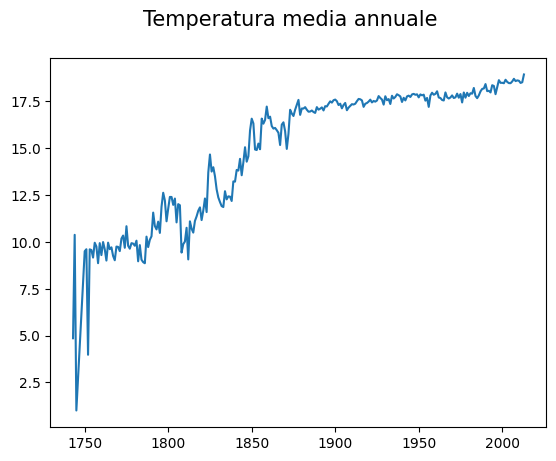

In [352]:
temp_year, temp_avg = zip(*temp_avg_temp_per_year.items())
plt.figure()
plt.suptitle('Temperatura media annuale', fontsize=15)
plt.plot(temp_year, temp_avg)
plt.show()

### Yield

In [353]:
yield_data = pd.read_csv('yield.csv')
yield_data.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [354]:
yield_data.isna().sum()

Domain Code     0
Domain          0
Area Code       0
Area            0
Element Code    0
Element         0
Item Code       0
Item            0
Year Code       0
Year            0
Unit            0
Value           0
dtype: int64

In [355]:
yield_data.describe()

,Area Code,Element Code,Item Code,Year Code,Year,Value
count,56717.000000,56717.0,56717.000000,56717.000000,56717.000000,56717.000000
mean,125.650422,5419.0,111.611651,1989.669570,1989.669570,62094.660084
std,75.120195,0.0,101.278435,16.133198,16.133198,67835.932856
min,1.000000,5419.0,15.000000,1961.000000,1961.000000,0.000000
25%,58.000000,5419.0,56.000000,1976.000000,1976.000000,15680.000000
50%,122.000000,5419.0,116.000000,1991.000000,1991.000000,36744.000000
75%,184.000000,5419.0,125.000000,2004.000000,2004.000000,86213.000000
max,351.000000,5419.0,489.000000,2016.000000,2016.000000,1000000.000000


Dalla tabella si può osservare che sono presenti stati che non hanno prodotto grano in un determinato anno

Alcune colonne sono ripetitive o non utili ai fini dello studio quindi decido di eliminarle

In [356]:
yield_data = yield_data.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Item Code', 'Element Code', 'Element', 'Unit', 'Area Code'])

In [357]:
wheat_yield_data = yield_data[yield_data['Item']=='Wheat']
wheat_yield_data

,Area,Item,Year,Value
168,Afghanistan,Wheat,1961,10220
169,Afghanistan,Wheat,1962,9735
170,Afghanistan,Wheat,1963,8317
171,Afghanistan,Wheat,1964,9510
172,Afghanistan,Wheat,1965,9723
...,...,...,...,...
56712,Zimbabwe,Wheat,2012,24420
56713,Zimbabwe,Wheat,2013,22888
56714,Zimbabwe,Wheat,2014,21357
56715,Zimbabwe,Wheat,2015,19826


Visto che tutte le istanze sono relative al grano, possiamo rimuovere la colonna `Item` poiché ridondante.

In [358]:
wheat_yield_data = wheat_yield_data.drop('Item', axis = 1)
wheat_yield_data['Area'] = wheat_yield_data['Area'].astype(pd.StringDtype())
wheat_yield_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6160 entries, 168 to 56716
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Area    6160 non-null   string
 1   Year    6160 non-null   int64 
 2   Value   6160 non-null   int64 
dtypes: int64(2), string(1)
memory usage: 192.5 KB


Per il nostro studio è necessario sapere solo la produzione di grano e non di tutti i prodotti del dataset, quindi elimino le righe non utili. Inoltre, cambiamo il nome della feature `Value` in `value_in_hg/ha` per indicare l'unità di misura.

In [359]:
wheat_yield_data.rename(columns = {'Value':'yield_in_hg/ha'}, inplace = True)
wheat_yield_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6160 entries, 168 to 56716
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Area            6160 non-null   string
 1   Year            6160 non-null   int64 
 2   yield_in_hg/ha  6160 non-null   int64 
dtypes: int64(2), string(1)
memory usage: 192.5 KB


Creo un grafico che rappresenta i 10 paesi con la produzione media in tutto il dataset maggiore

In [360]:
yield_country_list = wheat_yield_data['Area'].unique()
avg_wheat_production_per_country = {}
for i in yield_country_list:
    avg_wheat_production_per_country[i] = wheat_yield_data[wheat_yield_data['Area']==i]['yield_in_hg/ha'].mean()

In [361]:
avg_wheat_production_per_country = sorted(avg_wheat_production_per_country.items(), key=lambda kv: kv[1], reverse=True)
avg_wheat_production_per_country = avg_wheat_production_per_country[:10]

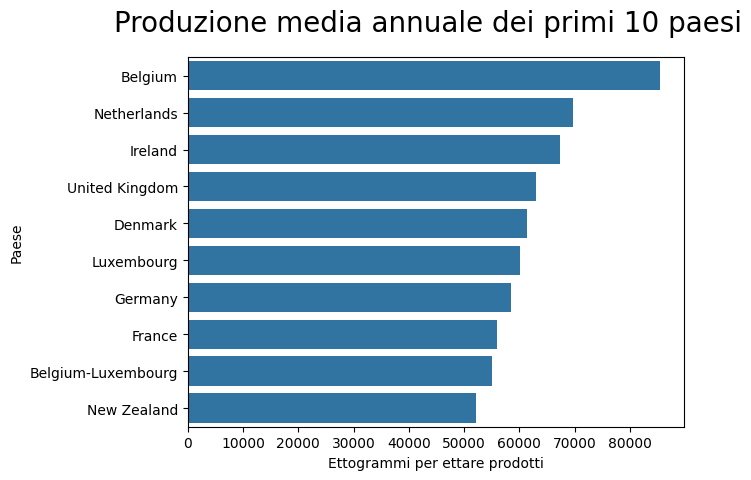

In [362]:
area, value = zip(*avg_wheat_production_per_country)
plt.figure()
plt.suptitle('Produzione media annuale dei primi 10 paesi', fontsize=20)
sns.barplot(y = area, x = value)
plt.xlabel('Ettogrammi per ettare prodotti')
plt.ylabel('Paese')
plt.show()

Nel seguente grafico rappresentiamo invece la media mondiale di produzione di grano per ogni anno

In [363]:
avg_production_per_year_dict = {}
yield_year_list = wheat_yield_data['Year'].unique()
yield_year_list.sort()
for i in yield_year_list:
    avg_production_per_year_dict[i] = wheat_yield_data[yield_data['Year']==i]['yield_in_hg/ha'].mean()

/tmp/ipykernel_7181/2423588110.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  avg_production_per_year_dict[i] = wheat_yield_data[yield_data['Year']==i]['yield_in_hg/ha'].mean()
/tmp/ipykernel_7181/2423588110.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  avg_production_per_year_dict[i] = wheat_yield_data[yield_data['Year']==i]['yield_in_hg/ha'].mean()
/tmp/ipykernel_7181/2423588110.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  avg_production_per_year_dict[i] = wheat_yield_data[yield_data['Year']==i]['yield_in_hg/ha'].mean()
/tmp/ipykernel_7181/2423588110.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  avg_production_per_year_dict[i] = wheat_yield_data[yield_data['Year']==i]['yield_in_hg/ha'].mean()
/tmp/ipykernel_7181/2423588110.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  avg_production_per_year_dict[

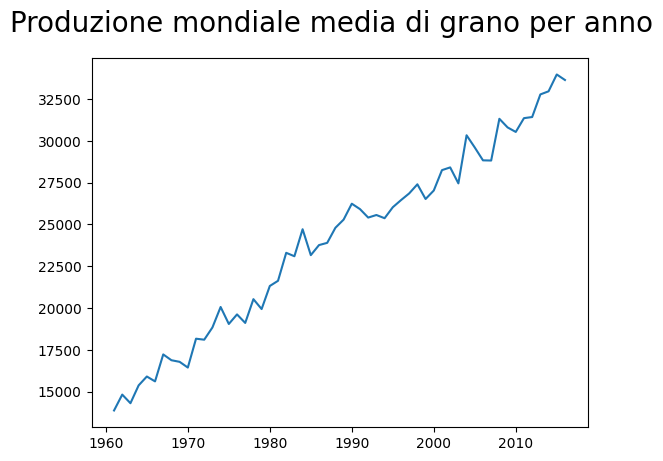

In [364]:
years, prod = zip(*avg_production_per_year_dict.items())
plt.figure()
plt.suptitle('Produzione mondiale media di grano per anno', fontsize=20)
sns.lineplot(y = prod, x = years)
plt.show()

### Population dataset

In [365]:
population_table = pd.read_csv('population.csv')
population_table.head()

/tmp/ipykernel_7181/511603389.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  population_table = pd.read_csv('population.csv')


,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,Location,...,Q0060Male,Q0060Female,Q1550,Q1550Male,Q1550Female,Q1560,Q1560Male,Q1560Female,NetMigrations,CNMR
0,1,900,NaN,NaN,NaN,1.0,1,World,0,World,...,580.7496,498.0396,240.3164,271.6253,208.1916,378.6968,430.2594,324.9308,0.0,0.0
1,1,900,NaN,NaN,NaN,1.0,1,World,0,World,...,566.7283,490.1993,231.1772,258.0905,203.7797,368.3186,415.8362,319.3364,0.0,0.0
2,1,900,NaN,NaN,NaN,1.0,1,World,0,World,...,546.3173,477.2639,218.6745,240.0344,197.1422,353.0546,395.5327,309.9103,0.0,0.0
3,1,900,NaN,NaN,NaN,1.0,1,World,0,World,...,535.8289,469.5325,212.8720,232.6019,193.0492,345.0826,385.8433,303.9053,0.0,0.0
4,1,900,NaN,NaN,NaN,1.0,1,World,0,World,...,523.1236,458.4842,205.7622,224.0498,187.4439,335.4420,374.6576,295.9944,0.0,0.0


Molte colonne presenti nel dataset non sono utili, posso quindi eliminarle dalla tabella

In [366]:
population_table = population_table.drop(columns=['SortOrder', 'LocID', 'Notes', 'ISO3_code', 'ISO2_code', 'SDMX_code',
       'LocTypeID', 'LocTypeName', 'ParentID', 'VarID', 'Variant', 'TPopulationMale1July', 'TPopulationFemale1July', 'PopDensity', 'PopSexRatio', 'MedianAgePop',
       'NatChange', 'NatChangeRT', 'PopChange', 'PopGrowthRate', 'TPopulation1July',
       'DoublingTime', 'Births', 'Births1519', 'CBR', 'TFR', 'NRR', 'MAC',
       'SRB', 'Deaths', 'DeathsMale', 'DeathsFemale', 'CDR', 'LEx', 'LExMale',
       'LExFemale', 'LE15', 'LE15Male', 'LE15Female', 'LE65', 'LE65Male',
       'LE65Female', 'LE80', 'LE80Male', 'LE80Female', 'InfantDeaths', 'IMR',
       'LBsurvivingAge1', 'Under5Deaths', 'Q5', 'Q0040', 'Q0040Male',
       'Q0040Female', 'Q0060', 'Q0060Male', 'Q0060Female', 'Q1550',
       'Q1550Male', 'Q1550Female', 'Q1560', 'Q1560Male', 'Q1560Female',
       'NetMigrations', 'CNMR'])

In [367]:
population_table

,Location,Time,TPopulation1Jan
0,World,1950,2477674.732
1,World,1951,2520969.582
2,World,1952,2565291.179
3,World,1953,2615250.618
4,World,1954,2665306.975
...,...,...,...
43467,Wallis and Futuna Islands,2097,10.063
43468,Wallis and Futuna Islands,2098,10.009
43469,Wallis and Futuna Islands,2099,9.969
43470,Wallis and Futuna Islands,2100,9.911


In [368]:
population_table.isna().sum()

Location           0
Time               0
TPopulation1Jan    0
dtype: int64

In [369]:
population_table['Time'].max()

2101

In questo dataset sono presenti delle predizioni del numero della popolazione fino al 2101, dato che non sono necessarie posso eliminarle tenendo nel dataset solo i dati fino all'anno 2013 (anno fino al quale possediamo i dati).

In [370]:
population_table = population_table.drop(population_table[population_table['Time']>2013].index)
population_table['Time'].max()

2013

In [371]:
def plotPopulation(location):
    plt.figure(figsize=(12, 5))
    location_df = population_table[population_table['Location']==location]
    location_df = location_df.drop(columns=['Location'])
    location_df = location_df.set_index('Time')
    plt.suptitle(f'Popolazione in {location}')
    plt.xlabel('Anni')
    plt.ylabel('Migliaia di abitanti')
    plt.plot(location_df, 'o-')
    plt.grid()
    plt.show()

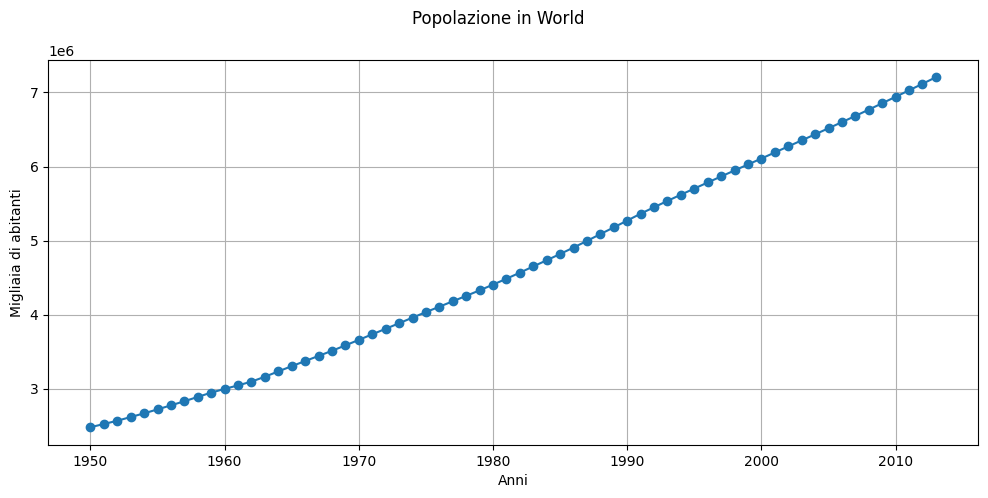

In [372]:
plotPopulation('World')

Come si può vedere dal grafico la popolazione mondiale è in crescita, si suppone quindi che ci sarà una domanda maggiore di grano di conseguenza una produzione maggiore

### Merge dei dataset

In [373]:
population_table.rename(columns = {'Location':'Area'}, inplace = True)
population_table.rename(columns = {'Time':'Year'}, inplace = True)
temp_data.rename(columns = {'country':'Area'}, inplace = True)
temp_data.rename(columns = {'year':'Year'}, inplace = True)
temp_yield_data = pd.merge(temp_data, wheat_yield_data, on=['Year','Area'])
pest_rain_data = pd.merge(rain,pest, on=['Year','Area'])
data = pd.merge(temp_yield_data, pd.merge(pest_rain_data, population_table, on=['Year', 'Area']),  on=['Year','Area'])


/tmp/ipykernel_7181/643569394.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_data.rename(columns = {'country':'Area'}, inplace = True)
/tmp/ipykernel_7181/643569394.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_data.rename(columns = {'year':'Year'}, inplace = True)


In [374]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1787 entries, 0 to 1786
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           1787 non-null   int64  
 1   Area                           1787 non-null   object 
 2   avg_temp                       1787 non-null   float64
 3   yield_in_hg/ha                 1787 non-null   int64  
 4   average_rain_fall_mm_per_year  1787 non-null   float64
 5   pesticides_in_t                1787 non-null   float64
 6   TPopulation1Jan                1787 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 97.9+ KB


In [375]:
data.head()

,Year,Area,avg_temp,yield_in_hg/ha,average_rain_fall_mm_per_year,pesticides_in_t,TPopulation1Jan
0,1990,Australia,16.80,16344,534.0,17866.0,16928.886
1,1991,Australia,16.78,14698,534.0,17866.0,17167.120
2,1992,Australia,15.78,17812,534.0,22234.0,17375.051
3,1993,Australia,16.71,19658,534.0,23899.0,17549.957
4,1994,Australia,16.43,11356,534.0,21057.0,17713.064


In [376]:
data.shape

(1787, 7)

In [377]:
data['Area'].unique().size

81

Vediamo che, dopo il merge, ci restano i dati realtivi soltanto a 82 stati. Questo è dovuto al fatto che alcuni stati non sono presenti in certi dataset. Di seguito, anche la lista degli stati presenti nel dataset finale ottenuto:

In [378]:
data['Area'].unique()

array(['Australia', 'India', 'Egypt', 'Algeria', 'Kazakhstan',
       'Netherlands', 'Madagascar', 'Eritrea', 'Greece', 'Iraq',
       'Azerbaijan', 'Mali', 'Thailand', 'Spain', 'Colombia', 'Lebanon',
       'United Kingdom', 'Brazil', 'Libya', 'Germany', 'Switzerland',
       'Belgium', 'Romania', 'Hungary', 'Burundi', 'Morocco', 'Denmark',
       'Argentina', 'Bangladesh', 'Qatar', 'Cameroon', 'Ireland',
       'South Africa', 'Tajikistan', 'Mexico', 'Pakistan', 'Botswana',
       'Guatemala', 'Ecuador', 'Zimbabwe', 'Finland', 'Japan', 'Sudan',
       'Uganda', 'Nepal', 'Ukraine', 'Rwanda', 'Canada', 'Malawi', 'Peru',
       'Portugal', 'Slovenia', 'Chile', 'Angola', 'Zambia', 'Mozambique',
       'Lesotho', 'Saudi Arabia', 'Italy', 'Belarus', 'Uruguay', 'Kenya',
       'Niger', 'Mauritania', 'Norway', 'France', 'Montenegro', 'Latvia',
       'Bulgaria', 'Sweden', 'Estonia', 'Honduras', 'Albania', 'Tunisia',
       'Austria', 'Lithuania', 'Poland', 'New Zealand', 'Namibia',
       'A

In [379]:
data['yield_in_hg/ha'].describe()

count     1787.000000
mean     30890.709569
std      20778.931700
min       1706.000000
25%      15708.500000
50%      24444.000000
75%      41497.500000
max      99387.000000
Name: yield_in_hg/ha, dtype: float64

Di seguito creiamo una funzione `show_data_of_country` che mostra i dati (yield, pioggia, temperatura, pesticidi) di un paese specifico. L'obiettivo è quello di capire se ci sia qualche correlazione tra le feature.

In [380]:
def show_data_of_country(data, country):
    data_of_country = data[data["Area"] == country]
    years = data_of_country['Year']
    rain = data_of_country['average_rain_fall_mm_per_year']
    temp = data_of_country['avg_temp']
    _yield = data_of_country['yield_in_hg/ha']
    pest = data_of_country['pesticides_in_t']
    population = data_of_country['TPopulation1Jan']
    
     # Create a figure and axes with 3x2 subplots (the last subplot will be empty)
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
    
    # First subplot: Rainfall
    axes[0, 0].plot(years, rain, marker='o', linestyle='-', color='b')
    axes[0, 0].set_title(f"Average Rainfall of {country}")
    axes[0, 0].set_xlabel('Year')
    axes[0, 0].set_ylabel('Average Rainfall (mm)')
    axes[0, 0].grid(True)

    # Second subplot: Temperature
    axes[0, 1].plot(years, temp, marker='o', linestyle='-', color='r')
    axes[0, 1].set_title(f"Average Temperature of {country}")
    axes[0, 1].set_xlabel('Year')
    axes[0, 1].set_ylabel('Average Temperature (°C)')
    axes[0, 1].grid(True)

    # Third subplot: Yield
    axes[1, 0].plot(years, _yield, marker='o', linestyle='-', color='g')
    axes[1, 0].set_title(f"Crop Yield of {country}")
    axes[1, 0].set_xlabel('Year')
    axes[1, 0].set_ylabel('Yield (hg/ha)')
    axes[1, 0].grid(True)

    # Fourth subplot: Pesticides
    axes[1, 1].plot(years, pest, marker='o', linestyle='-', color='m')
    axes[1, 1].set_title(f"Pesticides Usage of {country}")
    axes[1, 1].set_xlabel('Year')
    axes[1, 1].set_ylabel('Pesticides (t)')
    axes[1, 1].grid(True)

    # Fifth subplot: Population
    axes[2, 0].plot(years, population, marker='o', linestyle='-', color='c')
    axes[2, 0].set_title(f"Population of {country}")
    axes[2, 0].set_xlabel('Year')
    axes[2, 0].set_ylabel('Total Population(in thousands)')
    axes[2, 0].grid(True)
    
    # Remove the empty subplot (axes[2, 1])
    fig.delaxes(axes[2, 1])

    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    # Show the plot
    plt.show()
    

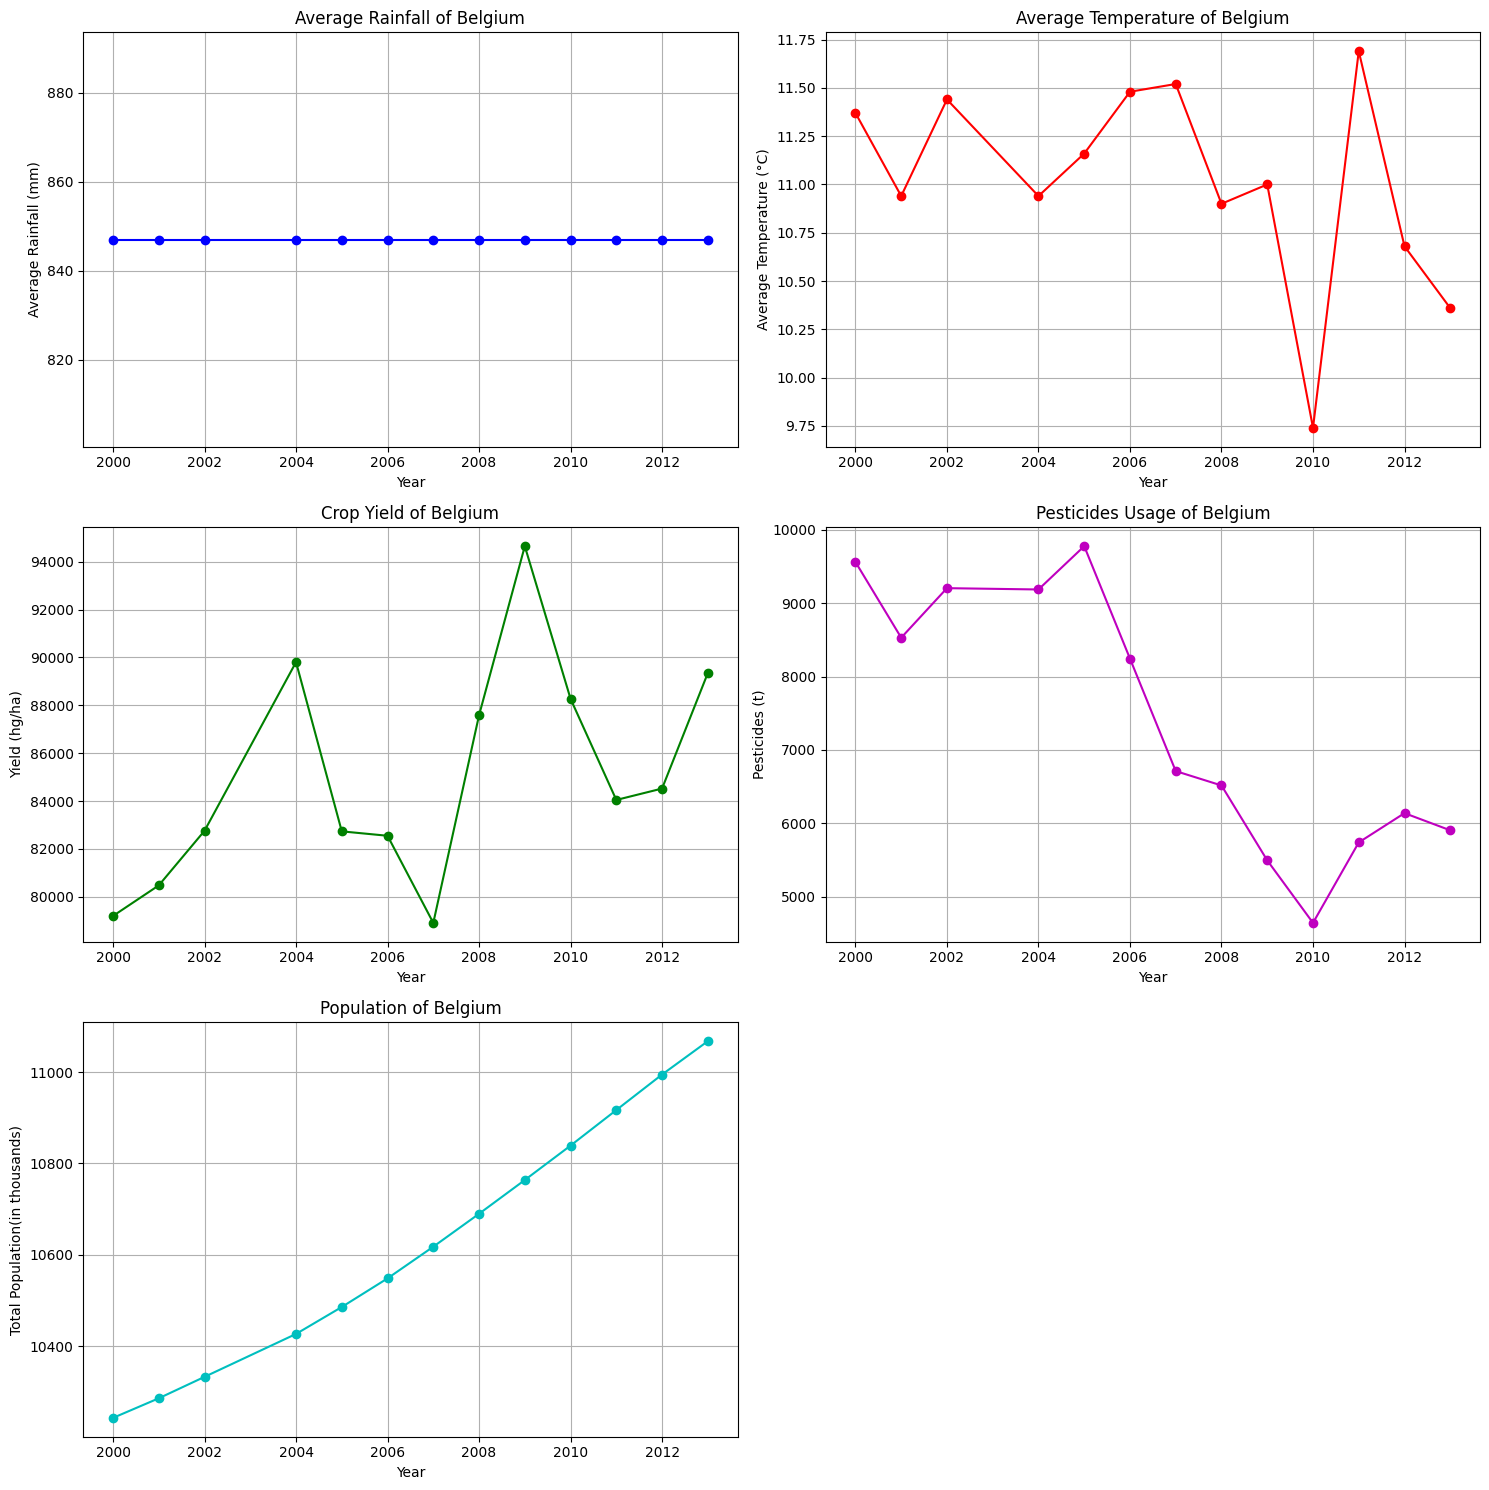

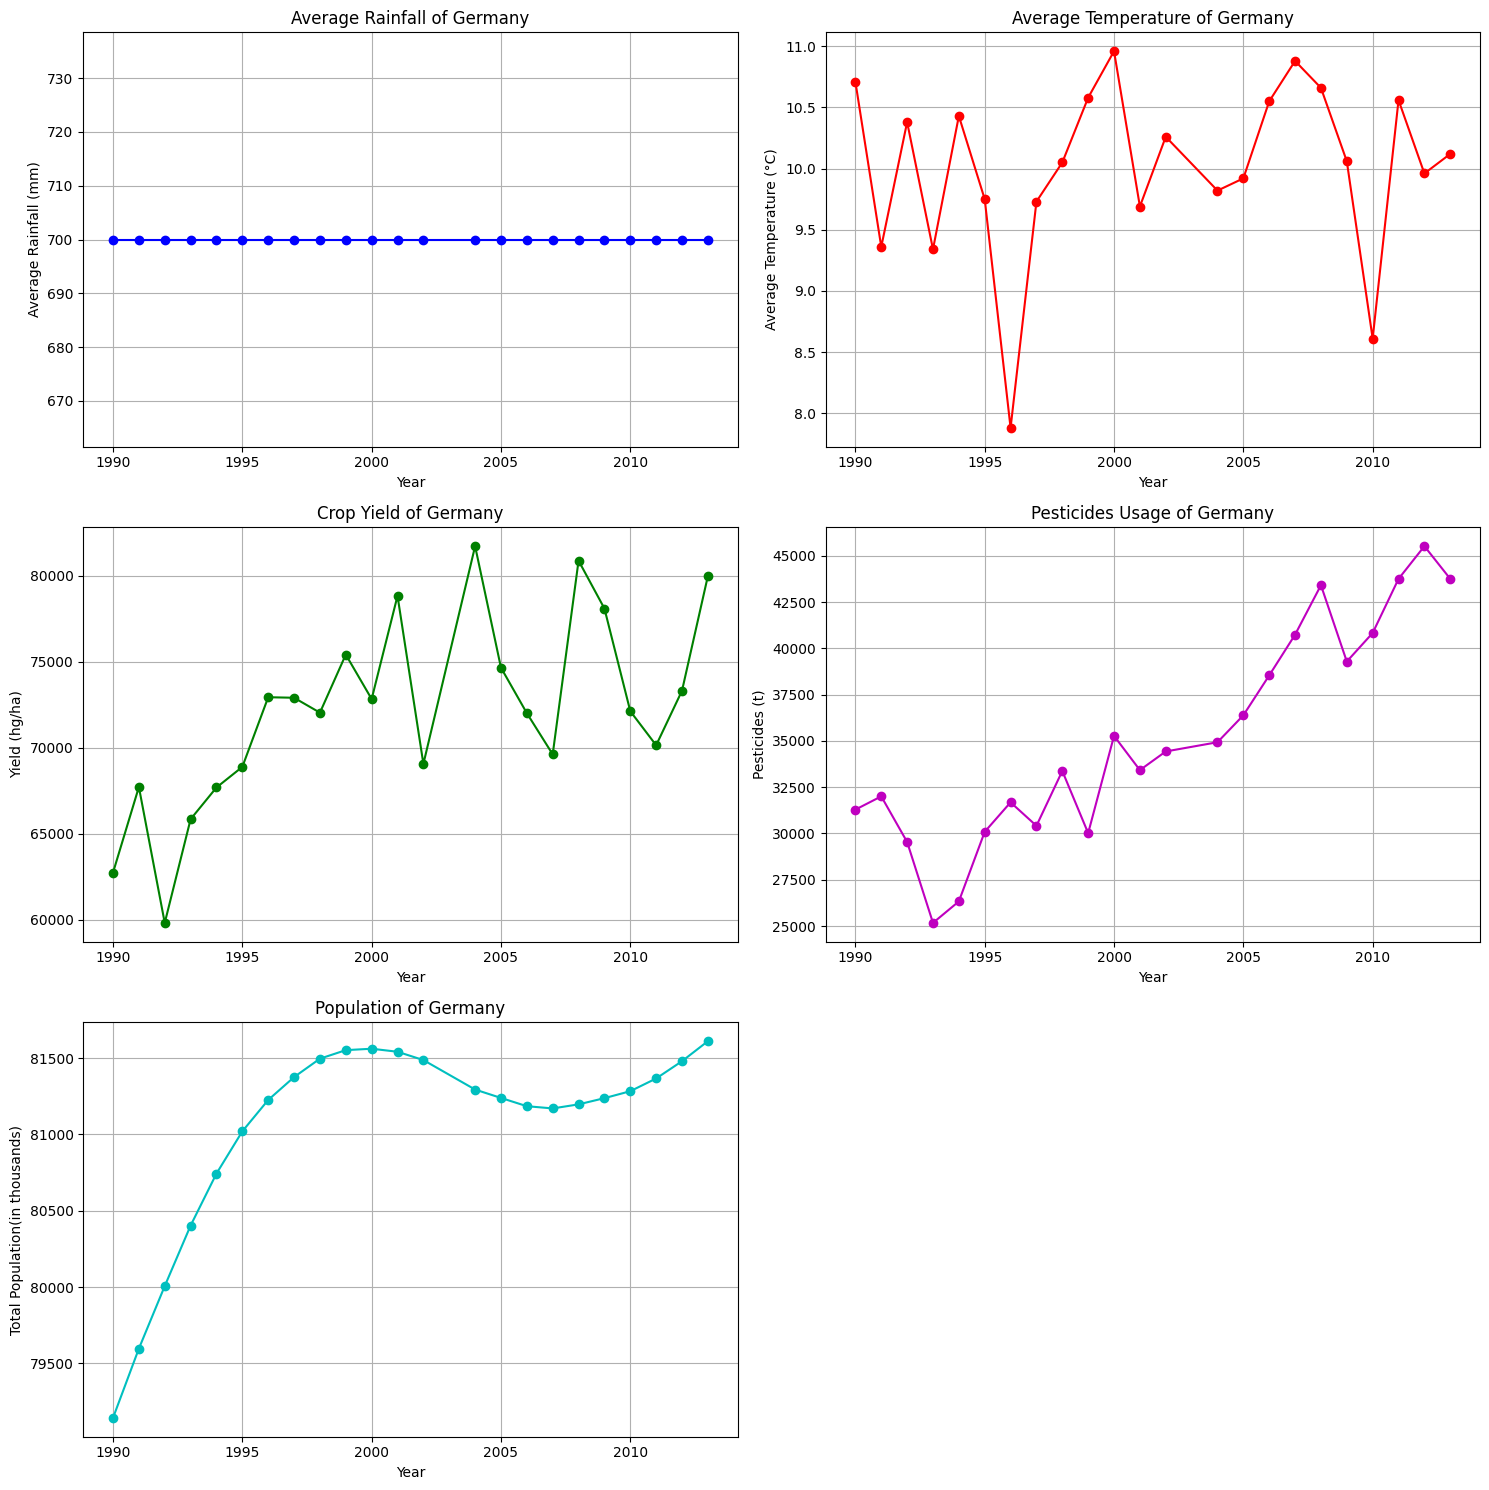

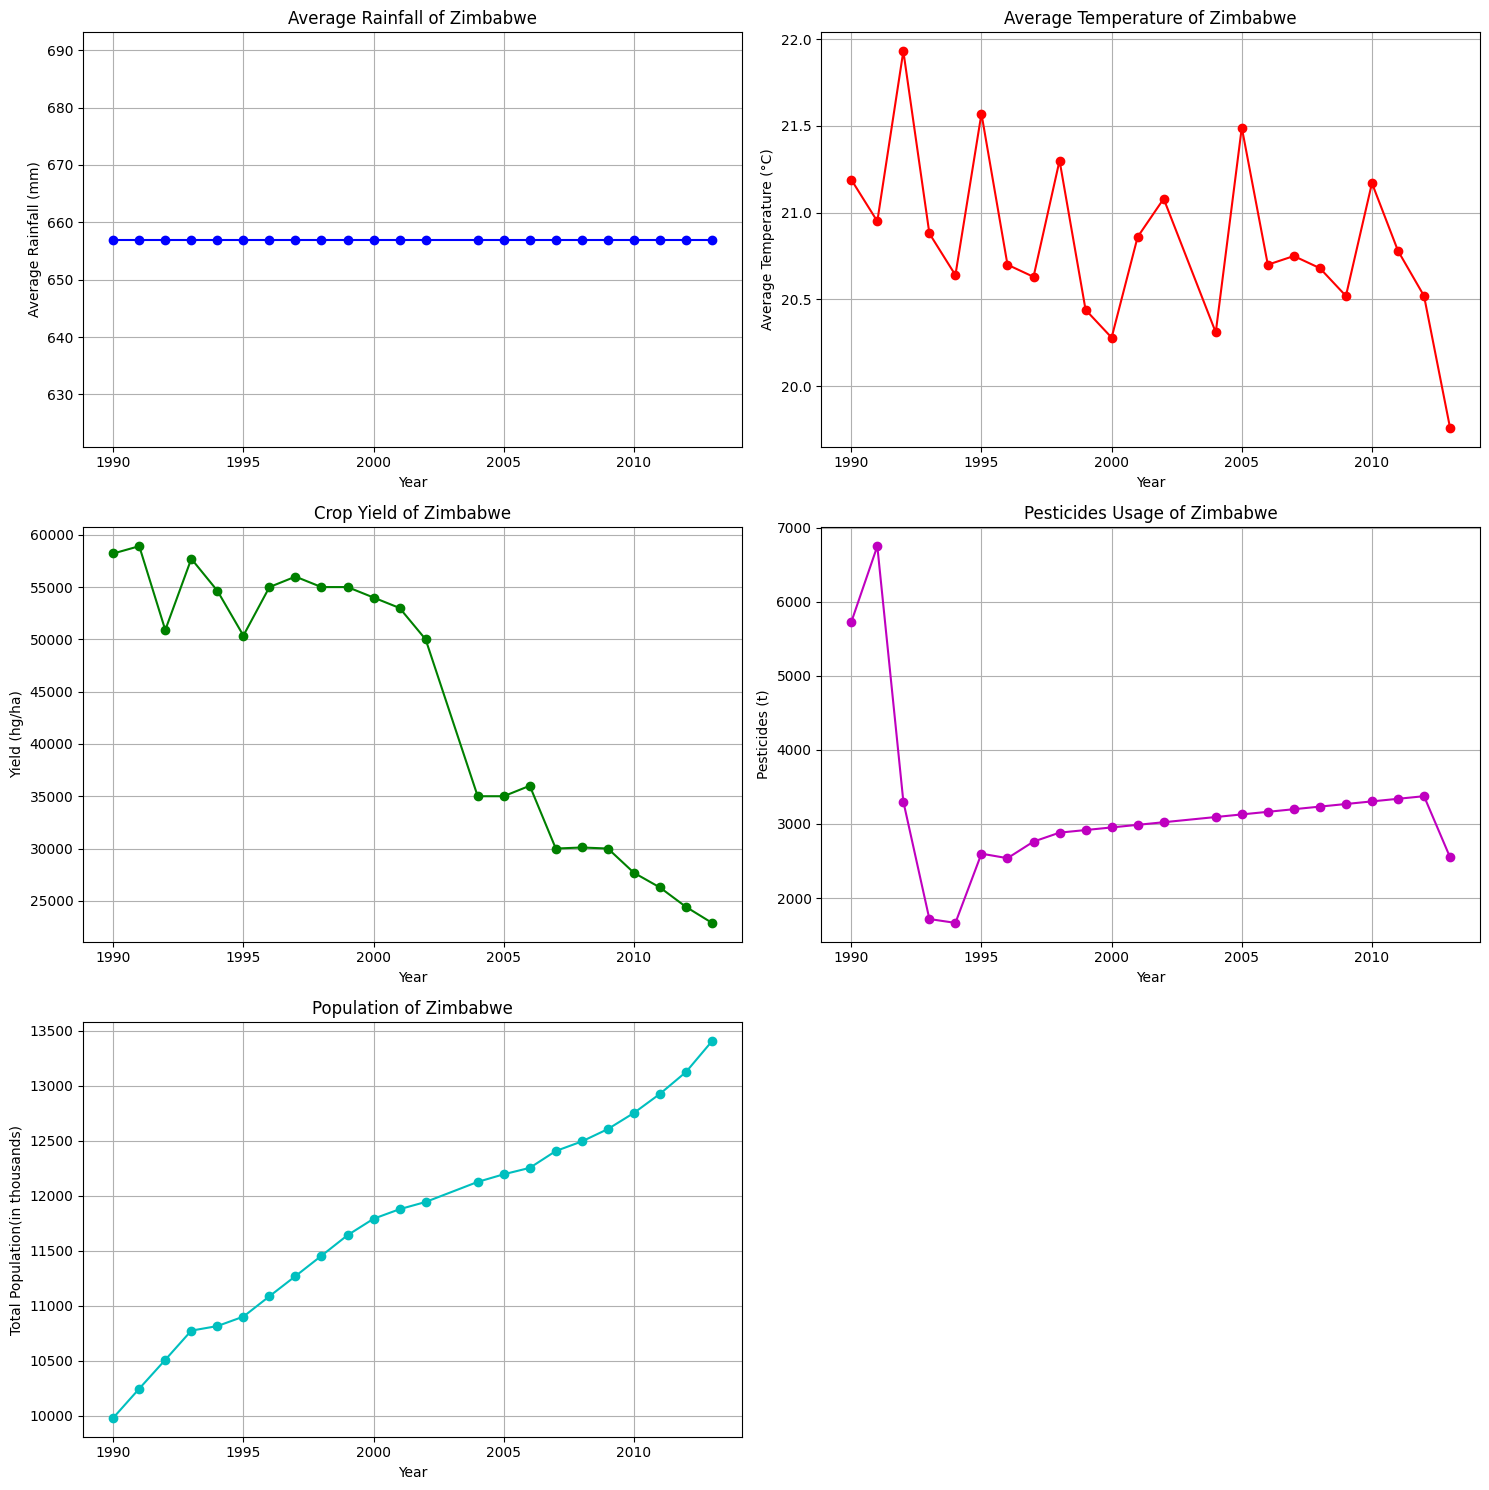

In [381]:
show_data_of_country(data, 'Belgium')
show_data_of_country(data, 'Germany')
show_data_of_country(data, 'Zimbabwe')

La funzione `show_data_of_country` prende come argomento il nome del paese che vogliamo esaminare e il frame contenente i dati. La funzione genera 4 grafici diversi, ognuno dei quali avente lungo l'asse x la lista degli anni per cui esistono osservazioni. Il primo grafico indica la quantità media di pioggia caduta negli anni, il secondo grafico indica la temperatura media negli anni, il terzo indica lo yield(raccolta) negli anni e l'ultimo indica l'utilizzo dei pesticidi(in tonnellate) negli anni.

Di sopra possiamo vedere i grafici relativi a 3 paesi: Germania, Belgio e Zimbabwe. Come possiamo notare, dai grafici risulta difficile trovare qualche correlazione tra le feature.

In [382]:
def show_global_data(data):
    years = data['Year'].unique()
    grouped_data = data.groupby('Year')
    global_rain = grouped_data['average_rain_fall_mm_per_year'].mean()
    global_pest = grouped_data['pesticides_in_t'].mean()
    global_temp = grouped_data['avg_temp'].mean()
    global_yield = grouped_data['yield_in_hg/ha'].mean()
    global_population = grouped_data['TPopulation1Jan'].sum()
    
    # Create a figure and axes with 3x2 subplots (the last subplot will be empty)
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
    
    # First subplot: Rainfall
    axes[0, 0].plot(years, global_rain, marker='o', linestyle='-', color='b')
    axes[0, 0].set_title("Global Average Rainfall")
    axes[0, 0].set_xlabel('Year')
    axes[0, 0].set_ylabel('Average Rainfall (mm)')
    axes[0, 0].grid(True)

    # Second subplot: Temperature
    axes[0, 1].plot(years, global_temp, marker='o', linestyle='-', color='r')
    axes[0, 1].set_title("Global Average Temperature")
    axes[0, 1].set_xlabel('Year')
    axes[0, 1].set_ylabel('Average Temperature (°C)')
    axes[0, 1].grid(True)

    # Third subplot: Yield
    axes[1, 0].plot(years, global_yield, marker='o', linestyle='-', color='g')
    axes[1, 0].set_title("Global Crop Yield")
    axes[1, 0].set_xlabel('Year')
    axes[1, 0].set_ylabel('Yield (hg/ha)')
    axes[1, 0].grid(True)

    # Fourth subplot: Pesticides
    axes[1, 1].plot(years, global_pest, marker='o', linestyle='-', color='m')
    axes[1, 1].set_title("Global Pesticides Usage")
    axes[1, 1].set_xlabel('Year')
    axes[1, 1].set_ylabel('Pesticides (t)')
    axes[1, 1].grid(True)

    # Fifth subplot: Population
    axes[2, 0].plot(years, global_population, marker='o', linestyle='-', color='c')
    axes[2, 0].set_title("Global Population")
    axes[2, 0].set_xlabel('Year')
    axes[2, 0].set_ylabel('Total Population')
    axes[2, 0].grid(True)
    
    # Remove the empty subplot (axes[2, 1])
    fig.delaxes(axes[2, 1])

    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    # Show the plot
    plt.show()

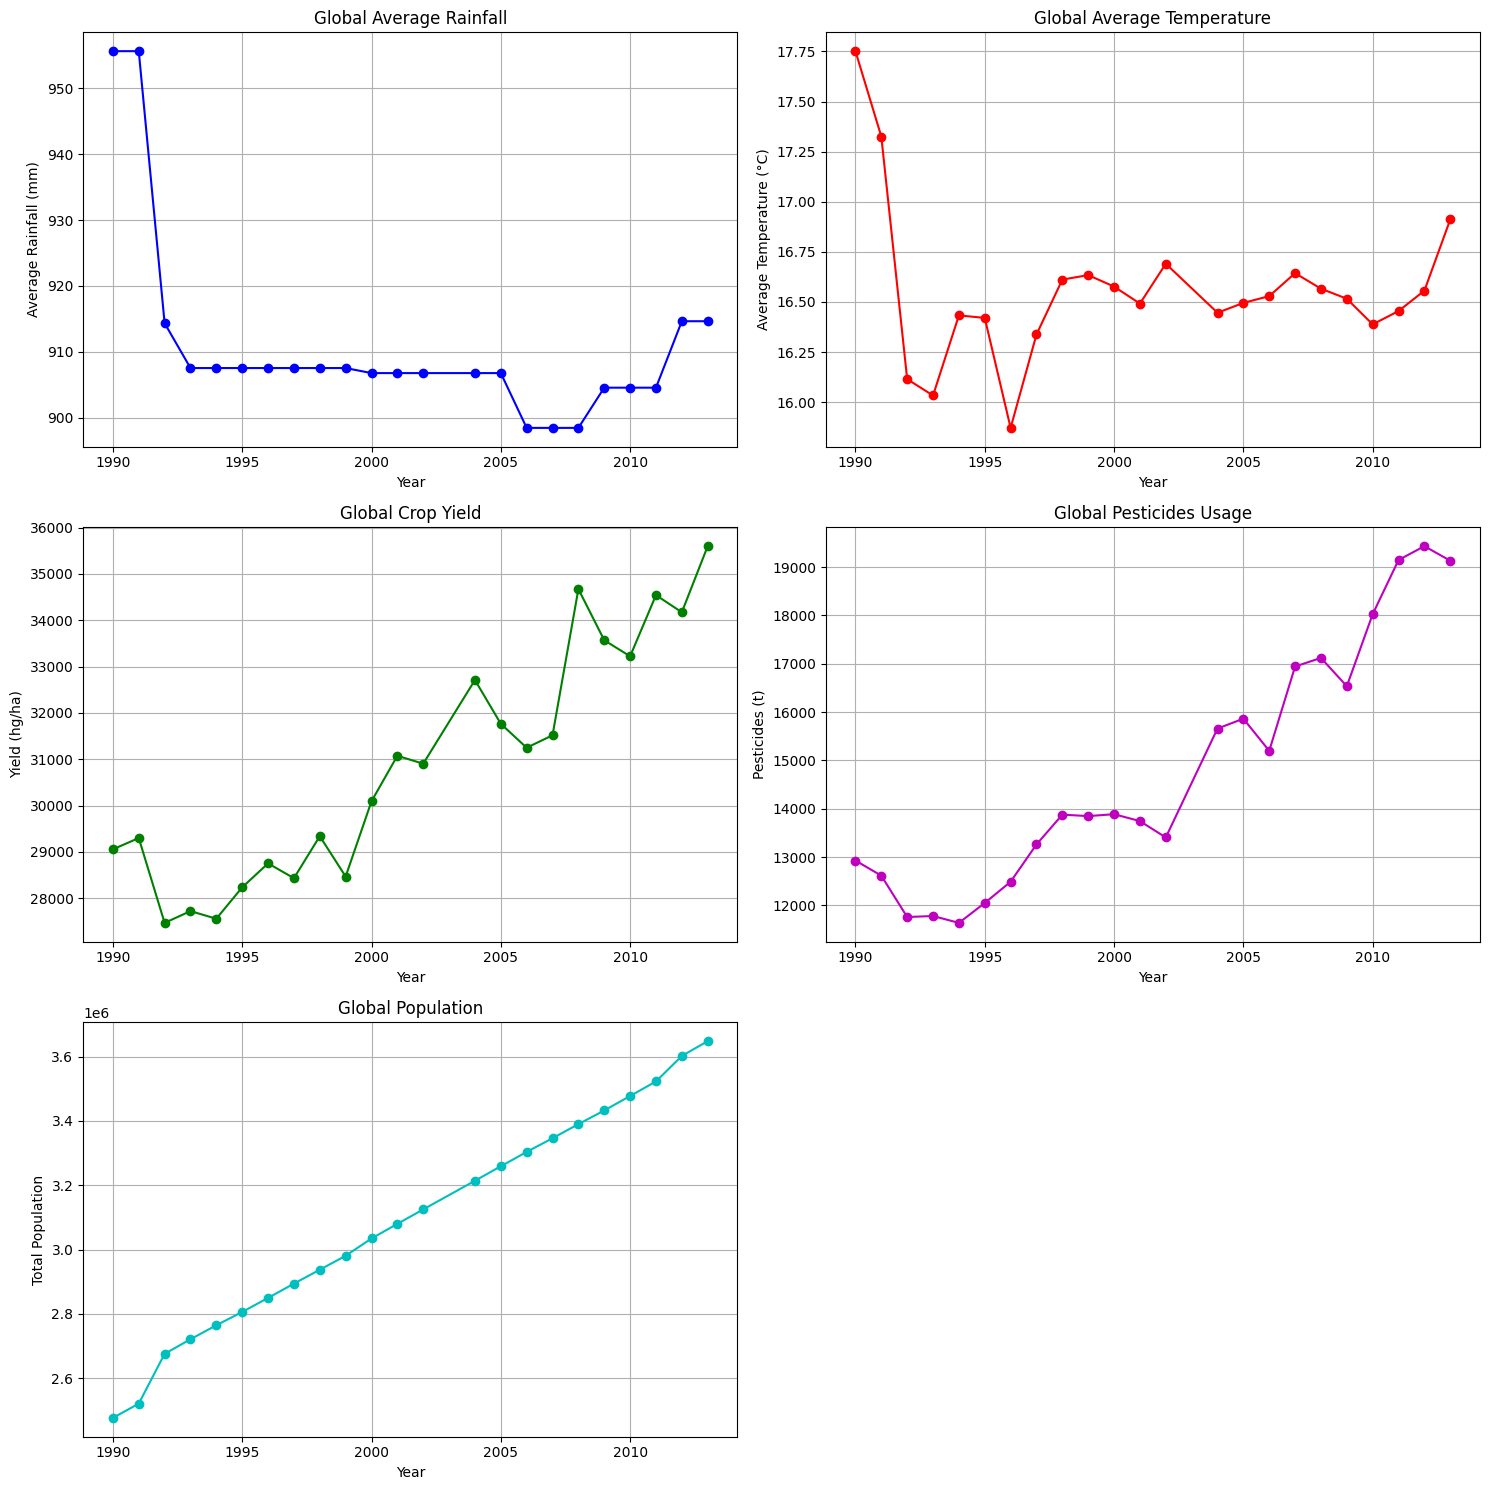

In [383]:
show_global_data(data)

Abbiamo definito anche un'altra funzione, chiamata `show_global_data`, la quale mostra le stesse informazioni di `show_data_of_country` però a scala globale. Osservando i grafici, in particolare il grafico dello yield e dei pesticidi, possiamo notare che sembra esserci una correlazione tra la produzione del grano e la quantità dei pesticidi utilizzati. Infatti, sembra che lo yield aumenti con l'aumentare dell' utilizzo dei pesticidi. Infatti, l'utilizzo dei pesticidi aumenta lo yield, proteggendo il grano da insetti o malattie che potrebbero danneggiarne la coltivazione.
Inoltre, notiamo che c'è un'ulteriore correlazione tra lo yield e la popolazione mondiale. Questo fatto ha senso, visto che con l'aumentare della popolazione, aumenta anche la domanda e di conseguenza l'offerta di grano.

# Preparazione dei dati

In [384]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

In [385]:
def convert_in_tons(x):
    return round(x/10000, 2)

In [386]:
data['yield_in_t/ha'] = data['yield_in_hg/ha'].apply(convert_in_tons)

In [387]:
data = data.drop(columns=['yield_in_hg/ha'])
data

,Year,Area,avg_temp,average_rain_fall_mm_per_year,pesticides_in_t,TPopulation1Jan,yield_in_t/ha
0,1990,Australia,16.80,534.0,17866.00,16928.886,1.63
1,1991,Australia,16.78,534.0,17866.00,17167.120,1.47
2,1992,Australia,15.78,534.0,22234.00,17375.051,1.78
3,1993,Australia,16.71,534.0,23899.00,17549.957,1.97
4,1994,Australia,16.43,534.0,21057.00,17713.064,1.14
...,...,...,...,...,...,...,...
1782,2009,Croatia,11.06,1113.0,2070.00,4388.107,5.19
1783,2010,Croatia,10.00,1113.0,1540.00,4376.152,4.04
1784,2011,Croatia,11.02,1113.0,1638.74,4361.212,5.22
1785,2012,Croatia,11.12,1113.0,1737.47,4342.471,5.35


In [388]:
def add_lagged_features(df, lag=1):
    # Lista delle colonne per cui vogliamo aggiungere le feature lag
    columns_to_lag = ['yield_in_t/ha']
    
    # Ciclo attraverso ogni colonna per creare le versioni ritardate (lagged)
    for column in columns_to_lag:
        for i in range(1, lag + 1):
            df[f'{column}_lag_{i}'] = df.groupby('Area')[column].shift(i)
    
    return df

# Supponiamo di avere un dataframe chiamato "data"
# Esegui la funzione per aggiungere le feature lag
data_with_lags = add_lagged_features(data, lag=5)

In [389]:
data_with_lags.head()

,Year,Area,avg_temp,average_rain_fall_mm_per_year,pesticides_in_t,TPopulation1Jan,yield_in_t/ha,yield_in_t/ha_lag_1,yield_in_t/ha_lag_2,yield_in_t/ha_lag_3,yield_in_t/ha_lag_4,yield_in_t/ha_lag_5
0,1990,Australia,16.80,534.0,17866.0,16928.886,1.63,NaN,NaN,NaN,NaN,NaN
1,1991,Australia,16.78,534.0,17866.0,17167.120,1.47,1.63,NaN,NaN,NaN,NaN
2,1992,Australia,15.78,534.0,22234.0,17375.051,1.78,1.47,1.63,NaN,NaN,NaN
3,1993,Australia,16.71,534.0,23899.0,17549.957,1.97,1.78,1.47,1.63,NaN,NaN
4,1994,Australia,16.43,534.0,21057.0,17713.064,1.14,1.97,1.78,1.47,1.63,NaN


In [390]:
data_with_lags.shape

(1787, 12)

In [391]:
data_with_lags = data_with_lags.dropna()
data_with_lags.shape

(1385, 12)

In [392]:
data_with_lags.head()

,Year,Area,avg_temp,average_rain_fall_mm_per_year,pesticides_in_t,TPopulation1Jan,yield_in_t/ha,yield_in_t/ha_lag_1,yield_in_t/ha_lag_2,yield_in_t/ha_lag_3,yield_in_t/ha_lag_4,yield_in_t/ha_lag_5
5,1995,Australia,16.14,534.0,25598.0,17897.944,1.79,1.14,1.97,1.78,1.47,1.63
6,1996,Australia,16.12,534.0,31185.0,18108.054,2.17,1.79,1.14,1.97,1.78,1.47
7,1997,Australia,16.48,534.0,34091.0,18315.637,1.84,2.17,1.79,1.14,1.97,1.78
8,1998,Australia,16.28,534.0,37215.0,18504.864,1.92,1.84,2.17,1.79,1.14,1.97
9,1999,Australia,16.77,534.0,34200.0,18698.470,2.01,1.92,1.84,2.17,1.79,1.14


In [393]:
X = data_with_lags.drop(columns=['yield_in_t/ha'])
y = data_with_lags['yield_in_t/ha']

In [394]:
numerical_features = ['avg_temp', 'average_rain_fall_mm_per_year', 'pesticides_in_t', 'TPopulation1Jan', 'yield_in_t/ha_lag_1',
                      'yield_in_t/ha_lag_2', 'yield_in_t/ha_lag_3', 'yield_in_t/ha_lag_4', 'yield_in_t/ha_lag_5']
categorical_feature = ['Area']
data = data.drop(columns=['Year'])

In [395]:
def split_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    return X_train, X_test, y_train, y_test

In [396]:
def create_pipeline(model, polynomial_degree=None):
    column_transformer = ColumnTransformer(
        transformers = [
            ('num', ..., numerical_features),
            ('cat', OneHotEncoder(), categorical_feature)
        ],
        remainder = 'passthrough',
    )
    transformation = [('preprocessor', column_transformer)]

    if polynomial_degree is not None:
        polynomial_transformer = PolynomialFeatures(degree = polynomial_degree, include_bias = False),
        transformation.append(('poly', polynomial_transformer))

    transformation.append(('model', model))

    return Pipeline(steps = transformation)

In [397]:
def train_model(pipeline, X_train, y_train, grid = None):

    if grid is not None:
        kf = KFold(5, shuffle = True, random_state = 42)
        pipeline = GridSearchCV(pipeline, grid, cv = kf)
        pipeline.fit(X_train, y_train)
    return pipeline    

In [398]:
def print_eval(X, y, model):
    preds = model.predict(X)
    mse = mean_squared_error(y, preds)
    re = mean_absolute_percentage_error(y, preds)
    r2 = r2_score(y, preds)
    print(f"   Mean squared error: {mse:.5}")
    print(f"       Relative error: {re:.5%}")
    print(f"R-squared coefficient: {r2:.5}")

In [399]:
def eval_model(pipeline, X_train, X_test, y_train, y_test):
    
    print("Model performance on training data:")
    print_eval(X_train, y_train, pipeline)
    print("--------------------------------------------")
    print("Model performance on test data:")
    print_eval(X_test, y_test, pipeline)
    print("--------------------------------------------")
    #Se ho utilizzato GridSearchCV
    if isinstance(pipeline, GridSearchCV):
        print("Best parameters obtained from GridSearchCV:")
        print(pipeline.best_params_)
        print("--------------------------------------------")
    #print(get_feature_importance(pipeline, numeric_vars, categoric_vars, binary_vars))

In [400]:
def train_eval_model(X, y, model, polynomial_degree = None, grid = None):
    X_train, X_test, y_train, y_test = split_data(X, y)
    pipeline = create_pipeline(model, polynomial_degree)
    pipeline = train_model(pipeline, X_train, y_train, grid)

    eval_model(pipeline, X_train, X_test, y_train, y_test)

    return pipeline

## Modelli
- Regressione lineare
- Polinomiale con standardizzazione -> 
- Polinomiale con normalizzazione
- Ridge o Kernel Ridge con grid search -> Usa regolarizzazione L2.La regolarizzazione modifica la funzione d'errore su cui si basa l'addestramento, aggiungendo una penalità per valori estremi dei parametri del modello.Nella regolarizzazione L2, la più comune, la penalità è proporzionale al quadrato della norma euclidea del vettore  θ  dei parametri: in questo modo parametri molto alti in valore assoluto sono molto penalizzati
- Lasso -> Usa regolarizzazione L1
- Elastic Net con grid search-> Combina insieme le regolarizzazioni L2 e L1 usate in ridge e lasso, modificabile tramite variabile in input.

In [401]:
from sklearn.model_selection import KFold
kfold_5 = KFold(5, shuffle=True, random_state=42)

Abbiamo deciso di aggiungere ulteriori features, derivate da quelle già presenti. In particolare, ci sembra interessante come il modello potrebbe giovare dal conoscere lo yield precedente ad

In [402]:
from sklearn.linear_model import LinearRegression, Ridge
data.head()

,Area,avg_temp,average_rain_fall_mm_per_year,pesticides_in_t,TPopulation1Jan,yield_in_t/ha,yield_in_t/ha_lag_1,yield_in_t/ha_lag_2,yield_in_t/ha_lag_3,yield_in_t/ha_lag_4,yield_in_t/ha_lag_5
0,Australia,16.80,534.0,17866.0,16928.886,1.63,NaN,NaN,NaN,NaN,NaN
1,Australia,16.78,534.0,17866.0,17167.120,1.47,1.63,NaN,NaN,NaN,NaN
2,Australia,15.78,534.0,22234.0,17375.051,1.78,1.47,1.63,NaN,NaN,NaN
3,Australia,16.71,534.0,23899.0,17549.957,1.97,1.78,1.47,1.63,NaN,NaN
4,Australia,16.43,534.0,21057.0,17713.064,1.14,1.97,1.78,1.47,1.63,NaN


### 1. Linear Regression

In [403]:
model = LinearRegression()

param_grid = {
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), "passthrough"],
    'preprocessor__cat__drop': [None, "first"],
    'preprocessor__cat__sparse_output': [True, False],
    'model__fit_intercept': [True, False],
}

%time lrp = train_eval_model(X, y, model, None, param_grid)

Model performance on training data:
   Mean squared error: 0.15865
       Relative error: 12.54623%
R-squared coefficient: 0.96273
--------------------------------------------
Model performance on test data:
   Mean squared error: 0.19985
       Relative error: 14.30029%
R-squared coefficient: 0.95853
--------------------------------------------
Best parameters obtained from GridSearchCV:
{'model__fit_intercept': True, 'preprocessor__cat__drop': 'first', 'preprocessor__cat__sparse_output': False, 'preprocessor__num': StandardScaler()}
--------------------------------------------
CPU times: user 4.03 s, sys: 6.73 s, total: 10.8 s
Wall time: 3.56 s


### 2. Ridge Regression

### 3. ElasticNet

### 4. Support Vector Regression